In [ ]:
# !pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
df_ss = yf.download('005930.KS','2025-07-01','2025-11-01')
df_ss.head()

C:\Users\eunkk\AppData\Local\Temp\ipykernel_23160\3219773705.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_ss = yf.download('005930.KS','2025-07-01','2025-11-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,
2025-07-01,59932.605469,60828.607876,59932.605469,60131.717115,13650991
2025-07-02,60529.937500,60629.493318,59534.379317,59932.602590,15047951
2025-07-03,63516.613281,63516.613281,60828.606136,61027.717776,32040639
2025-07-04,63018.835938,64412.617459,62720.168469,64412.617459,23748959
2025-07-07,61425.941406,63018.834538,61425.941406,62620.611255,17164708


In [ ]:
df_sk = yf.download('000660.KS','2025-07-01','2025-11-01')
df_sk.head()

C:\Users\eunkk\AppData\Local\Temp\ipykernel_23160\1689236385.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_sk = yf.download('000660.KS','2025-07-01','2025-11-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,000660.KS,000660.KS,000660.KS,000660.KS,000660.KS
Date,,,,,
2025-07-01,285088.21875,294075.237905,285088.218750,290580.286011,3687981
2025-07-02,278597.59375,283091.103327,274104.084173,283091.103327,4702056
2025-07-03,278098.31250,283590.379713,276600.475987,280594.706688,3642140
2025-07-04,270109.84375,281093.977877,268612.007278,279096.862581,3654933
2025-07-07,270609.12500,271607.682657,264118.500231,265616.336716,2523564


In [ ]:
# df_ss.to_csv("samsung.csv")
# df_sk.to_csv('sk_hynix.csv')

In [ ]:
from google.colab import drive
import os

drive.mount("/content/gdrive/") # 지정 위치와 구글 드라이브 연결
file_path = '/content/gdrive/MyDrive/GMSW/project/data/'

In [ ]:
df_ss = pd.read_csv(file_path+'samsung.csv')
df_sk = pd.read_csv(file_path+'sk_hynix.csv')

In [ ]:
df = pd.merge(df_ss, df_sk)
df.head()

,Date,samsung,SKhynix
0,2025-07-01,59932.60547,285088.2188
1,2025-07-02,60529.93750,278597.5938
2,2025-07-03,63516.61328,278098.3125
3,2025-07-04,63018.83594,270109.8438
4,2025-07-07,61425.94141,270609.1250


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

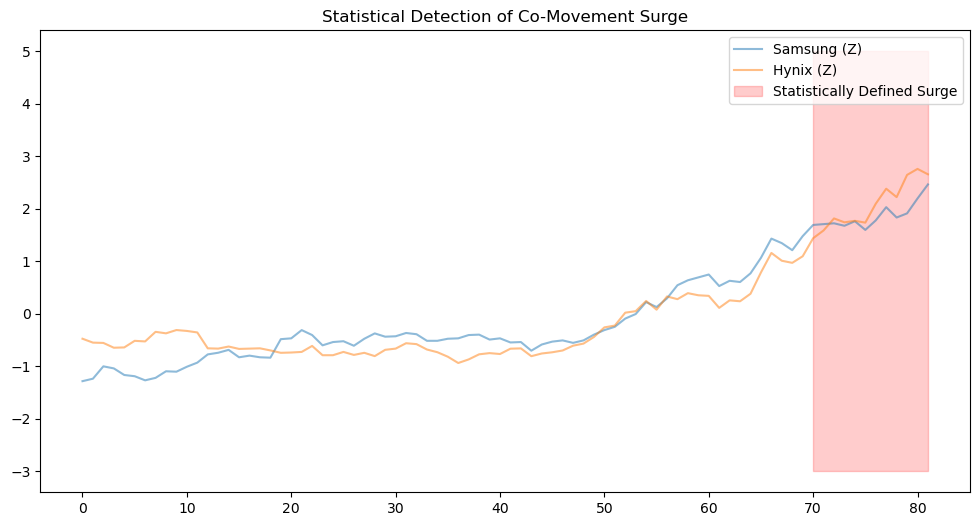

In [ ]:
# 정규화 (Z-Score 변환): '종가' 기준 표준화
df['Z_Samsung'] = zscore(df['samsung'])
df['Z_Hynix'] = zscore(df['SKhynix'])

# 급등 시그널 탐지 (평균보다 1표준편차 이상 높고, 합쳐서 강력한 경우)
df['Composite_Signal'] = df['Z_Samsung'] + df['Z_Hynix']

# 임계값 설정 (예: 상위 10% 강도 혹은 절대값 3 이상)
threshold = 3.0
surge_dates = df[df['Composite_Signal'] > threshold].index

# 4. 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Z_Samsung'], label='Samsung (Z)', alpha=0.5)
plt.plot(df.index, df['Z_Hynix'], label='Hynix (Z)', alpha=0.5)

# 급등 구간 표시
plt.fill_between(df.index, -3, 5, where=(df['Composite_Signal'] > threshold),
                 color='red', alpha=0.2, label='Statistically Defined Surge')

plt.title("Statistical Detection of Co-Movement Surge")
plt.legend()
plt.show()

In [ ]:
df.tail(15)

,Date,samsung,SKhynix,Z_Samsung,Z_Hynix,Composite_Signal
67,2025-10-13,93300.0,415000.0,1.345213,1.010081,2.355294
68,2025-10-14,91600.0,411500.0,1.211286,0.970063,2.181349
69,2025-10-15,95000.0,422500.0,1.479140,1.095835,2.574975
70,2025-10-16,97700.0,452500.0,1.691848,1.438850,3.130698
71,2025-10-17,97900.0,465500.0,1.707604,1.587490,3.295094
72,2025-10-20,98100.0,485500.0,1.723360,1.816167,3.539527
73,2025-10-21,97500.0,479000.0,1.676092,1.741847,3.417939
74,2025-10-22,98600.0,481500.0,1.762750,1.770431,3.533182
75,2025-10-23,96500.0,478500.0,1.597311,1.736130,3.333441
76,2025-10-24,98800.0,510000.0,1.778506,2.096296,3.874802
